# WiDS Datathon 2025: Brain Imaging Analysis
## Data Exploration and Feature Selection

This notebook explores the brain imaging data from TRAIN_NEW directory for predicting ADHD diagnosis and biological sex.

In [5]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set plotting style and figure size
plt.style.use('default')  # Using default style instead of seaborn
plt.rcParams['figure.figsize'] = (12, 6)

# Define paths
data_dir = Path("/Users/winniecheng/Desktop/Bay Brain/widsdatathon2025/TRAIN_NEW")

# Load the solutions file first to understand our targets
solutions = pd.read_excel(data_dir / "TRAINING_SOLUTIONS.xlsx")

# Display basic information about the solutions file
print("Solutions Data Shape:", solutions.shape)
print("\nFirst few rows:")
print(solutions.head())
print("\nTarget variable distributions:")
print(solutions.describe())

Solutions Data Shape: (1213, 3)

First few rows:
  participant_id  ADHD_Outcome  Sex_F
0   UmrK0vMLopoR             1      1
1   CPaeQkhcjg7d             1      0
2   Nb4EetVPm3gs             1      0
3   p4vPhVu91o4b             1      1
4   M09PXs7arQ5E             1      1

Target variable distributions:
       ADHD_Outcome        Sex_F
count   1213.000000  1213.000000
mean       0.685078     0.342951
std        0.464676     0.474891
min        0.000000     0.000000
25%        0.000000     0.000000
50%        1.000000     0.000000
75%        1.000000     1.000000
max        1.000000     1.000000



=== Solutions File Column Names ===
['participant_id', 'ADHD_Outcome', 'Sex_F']

=== First few rows of solutions data ===
  participant_id  ADHD_Outcome  Sex_F
0   UmrK0vMLopoR             1      1
1   CPaeQkhcjg7d             1      0
2   Nb4EetVPm3gs             1      0
3   p4vPhVu91o4b             1      1
4   M09PXs7arQ5E             1      1

=== Solutions Data Exploration (Corrected) ===


Basic statistics for each target:
       ADHD_Outcome        Sex_F
count   1213.000000  1213.000000
mean       0.685078     0.342951
std        0.464676     0.474891
min        0.000000     0.000000
25%        0.000000     0.000000
50%        1.000000     0.000000
75%        1.000000     1.000000
max        1.000000     1.000000

Value counts for ADHD_Outcome:
ADHD_Outcome
1    831
0    382
Name: count, dtype: int64

Value counts for Sex_F:
Sex_F
0    797
1    416
Name: count, dtype: int64


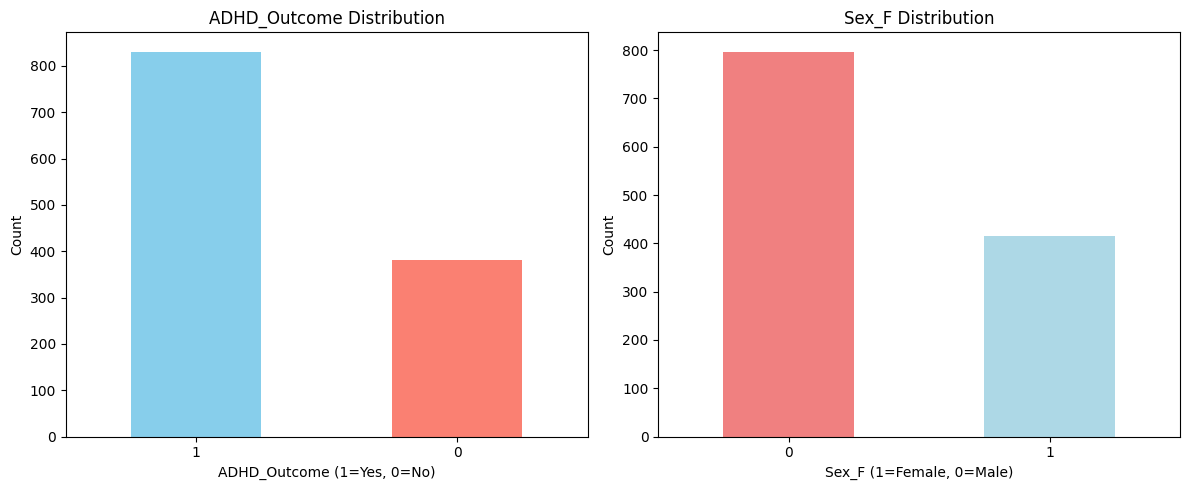

In [ ]:
# First, let's check the actual column names in the solutions file
print("\n=== Solutions File Column Names ===")
print(solutions.columns.tolist())

# Then let's look at the first few rows to see the actual data
print("\n=== First few rows of solutions data ===")
print(solutions.head())# Step 2 (Corrected): Detailed exploration of solutions data

# --- Replace these placeholder names with the actual column names ---
adhd_col = 'ADHD_Outcome'
sex_col = 'Sex_F'
# --------------------------------------------------------------------

print("\n=== Solutions Data Exploration (Corrected) ===\n")

print("\nBasic statistics for each target:")
# Select only the target columns for description
print(solutions[[adhd_col, sex_col]].describe())

print(f"\nValue counts for {adhd_col}:")
print(solutions[adhd_col].value_counts())

print(f"\nValue counts for {sex_col}:")
print(solutions[sex_col].value_counts())

# Visualize target distributions# Step 3: Load and Explore Quantitative Metadata
print("\n=== Quantitative Metadata Exploration ===\n")

# Define the file path
quant_meta_path = data_dir / "TRAIN_QUANTITATIVE_METADATA_new.xlsx"

# Load the quantitative metadata
quant_meta = pd.read_excel(quant_meta_path)

# Display basic information
print("Quantitative Metadata Shape:", quant_meta.shape)
print("\nFirst few rows:")
print(quant_meta.head())

# Check data types and non-null counts
print("\nData Info:")
quant_meta.info()

# Get basic statistics for numerical columns
print("\nBasic Statistics:")
print(quant_meta.describe())

# Check for missing values
print("\nMissing Values per Column:")
print(quant_meta.isnull().sum())
plt.figure(figsize=(12, 5)) # Adjusted figure size slightly

plt.subplot(1, 2, 1)
solutions[adhd_col].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title(f'{adhd_col} Distribution')
plt.xlabel(f'{adhd_col} (1=Yes, 0=No)') # Assuming 1=Yes, 0=No, adjust if needed
plt.ylabel('Count')
plt.xticks(rotation=0) # Keep labels horizontal

plt.subplot(1, 2, 2)
solutions[sex_col].value_counts().plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title(f'{sex_col} Distribution')
plt.xlabel(f'{sex_col} (1=Female, 0=Male)') # Assuming 1=Female, 0=Male, adjust if needed
plt.ylabel('Count')
plt.xticks(rotation=0) # Keep labels horizontal

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

In [8]:
# Step 3: Load and Explore Quantitative Metadata
print("\n=== Quantitative Metadata Exploration ===\n")

# Define the file path
quant_meta_path = data_dir / "TRAIN_QUANTITATIVE_METADATA_new.xlsx"

# Load the quantitative metadata
quant_meta = pd.read_excel(quant_meta_path)

# Display basic information
print("Quantitative Metadata Shape:", quant_meta.shape)
print("\nFirst few rows:")
print(quant_meta.head())

# Check data types and non-null counts
print("\nData Info:")
quant_meta.info()

# Get basic statistics for numerical columns
print("\nBasic Statistics:")
print(quant_meta.describe())

# Check for missing values
print("\nMissing Values per Column:")
print(quant_meta.isnull().sum())


=== Quantitative Metadata Exploration ===

Quantitative Metadata Shape: (1213, 19)

First few rows:
  participant_id  EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  \
0   00aIpNTbG5uh         100.00                  13.0             3.0   
1   00fV0OyyoLfw          92.27                  14.0             3.0   
2   04X1eiS79T4B          86.67                  14.0             3.0   
3   05ocQutkURd6          93.34                  14.0             3.0   
4   06YUNBA9ZRLq           0.00                  14.0             8.0   

   APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  \
0            15.0             44.0             14.0            20.0   
1            12.0             35.0             25.0            28.0   
2            21.0             37.0             18.0            26.0   
3            11.0             42.0             15.0            20.0   
4            12.0             35.0             22.0            12.0   

   APQ_P_APQ_P_PP  SDQ_SDQ_Conduc

In [9]:
# Step 4: Load and Explore Categorical Metadata
print("\n=== Categorical Metadata Exploration ===\n")

# Define the file path
cat_meta_path = data_dir / "TRAIN_CATEGORICAL_METADATA_new.xlsx"

# Load the categorical metadata
cat_meta = pd.read_excel(cat_meta_path)

# Display basic information
print("Categorical Metadata Shape:", cat_meta.shape)
print("\nFirst few rows:")
print(cat_meta.head())

# Check data types and non-null counts
# This helps identify columns that are truly categorical (object type)
print("\nData Info:")
cat_meta.info()

# Get descriptive statistics for object/categorical columns
print("\nBasic Statistics for Categorical Columns:")
# Include 'object' to describe string/categorical columns
# For numerical columns that might represent categories (like IDs), we might need further inspection
print(cat_meta.describe(include=['object']))

# Check for missing values
print("\nMissing Values per Column:")
print(cat_meta.isnull().sum())

# Optional: Check unique values for a few key categorical columns if needed
# Example: print("\nUnique values in 'Example_Column':", cat_meta['Example_Column'].unique())


=== Categorical Metadata Exploration ===

Categorical Metadata Shape: (1213, 10)

First few rows:
  participant_id  Basic_Demos_Enroll_Year  Basic_Demos_Study_Site  \
0   00aIpNTbG5uh                     2019                       4   
1   00fV0OyyoLfw                     2017                       1   
2   04X1eiS79T4B                     2017                       1   
3   05ocQutkURd6                     2018                       1   
4   06YUNBA9ZRLq                     2018                       1   

   PreInt_Demos_Fam_Child_Ethnicity  PreInt_Demos_Fam_Child_Race  \
0                               1.0                          0.0   
1                               0.0                          9.0   
2                               1.0                          2.0   
3                               3.0                          8.0   
4                               0.0                          1.0   

   MRI_Track_Scan_Location  Barratt_Barratt_P1_Edu  Barratt_Barratt_P1_Occ  \

In [10]:
# Step 5: Load and Explore Functional Connectome Data
print("\n=== Functional Connectome Data Exploration ===\n")

# Define the file path
connectome_path = data_dir / "TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv"

# Load the connectome data (this might take some time)
print(f"Loading connectome data from: {connectome_path}...")
connectome_data = pd.read_csv(connectome_path)
print("Connectome data loaded.")

# Display basic information
print("\nConnectome Data Shape:", connectome_data.shape)
print("\nFirst few rows:")
print(connectome_data.head())

# Check data types and non-null counts
# Expecting mostly numerical (float) types for connectivity values
print("\nData Info (checking first few columns for types):")
# Use .info() but might be slow for many columns, let's check dtypes directly
print(connectome_data.iloc[:, :5].info()) # Info for first 5 columns
print("\nData types of all columns (example):")
print(connectome_data.dtypes.value_counts()) # Count of different data types

# Check for missing values (important!)
print("\nMissing Values per Column (showing columns with any missing values):")
missing_values = connectome_data.isnull().sum()
print(missing_values[missing_values > 0])
print(f"\nTotal missing values in connectome data: {missing_values.sum()}")

# Basic statistics for a sample of columns (optional, can be slow)
# print("\nBasic Statistics (sample columns):")
# print(connectome_data.iloc[:, 1:6].describe()) # Describe first 5 feature columns


=== Functional Connectome Data Exploration ===

Loading connectome data from: /Users/winniecheng/Desktop/Bay Brain/widsdatathon2025/TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv...
Connectome data loaded.

Connectome Data Shape: (1213, 19901)

First few rows:
  participant_id  0throw_1thcolumn  0throw_2thcolumn  0throw_3thcolumn  \
0   70z8Q2xdTXM3          0.222930          0.527903          0.429966   
1   WHWymJu6zNZi          0.614765          0.577255          0.496127   
2   4PAQp1M6EyAo         -0.116833          0.458408          0.260703   
3   obEacy4Of68I          0.199688          0.752714          0.658283   
4   s7WzzDcmDOhF          0.227321          0.613268          0.621447   

   0throw_4thcolumn  0throw_5thcolumn  0throw_6thcolumn  0throw_7thcolumn  \
0          0.060457          0.566489          0.315342          0.508408   
1          0.496606          0.404686          0.439724          0.122590   
2          0.639031          0.769337     